In [150]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBRFClassifier

from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Import labeled data

In [168]:
labeled_df = pd.read_csv("../data/user_labeled/final_labeled.csv")
print(labeled_df.label.value_counts())
labeled_df

after     196
before     94
Name: label, dtype: int64


,node,label,degree,category_matches_with_source,in_edges,out_edges,shared_neighbors_with_entry_score,centrality,page_rank,adjusted_reciprocity,shortest_path_length_from_entry,shortest_path_length_to_entry,jaccard_similarity,primary_link,similarity_rank
0,StarCraft II: Heart of the Swarm,after,0.010420,1.000000,0.005118,0.043292,0.320449,0.592755,0.002671,0.056061,0.166667,0.20,0.247350,0.0,1.000000
1,StarCraft (video game),before,0.017115,0.916667,0.005065,0.095554,0.196211,1.000000,0.003881,0.087879,0.166667,0.20,0.252669,1.0,0.905361
2,StarCraft: Brood War,before,0.011578,0.833333,0.006120,0.044852,0.202199,0.648033,0.002642,0.053030,0.166667,0.20,0.203883,0.0,0.816960
3,StarCraft II: Legacy of the Void,after,0.008859,0.750000,0.004221,0.037832,0.294207,0.542680,0.001999,0.048485,0.166667,0.20,0.208633,0.0,0.775480
4,StarCraft II: Wings of Liberty,after,0.021544,0.083333,0.013506,0.067473,1.000000,0.995219,0.007313,0.110606,0.000000,0.00,1.000000,0.0,0.548565
5,Jim Raynor,after,0.003977,0.000000,0.002163,0.015211,0.109752,0.088870,0.000506,0.034848,0.166667,0.20,0.133588,1.0,0.101773
6,List of StarCraft media,after,0.006393,0.083333,0.001741,0.037051,0.123632,0.131356,0.000439,0.033333,0.166667,0.20,0.128906,0.0,0.099830
7,Races of StarCraft,before,0.008557,0.083333,0.003218,0.042902,0.134990,0.144347,0.001264,0.036364,0.166667,0.20,0.182836,0.0,0.097667
8,Real-time strategy,before,0.080439,0.083333,0.068271,0.118955,0.042367,0.268845,0.040270,0.271212,0.166667,0.20,0.031271,1.0,0.084069
9,StarCraft,before,0.032468,0.083333,0.019363,0.108814,0.193881,0.316930,0.011237,0.121212,0.166667,0.20,0.198077,0.0,0.078426


# Exploration - PCA Plotting

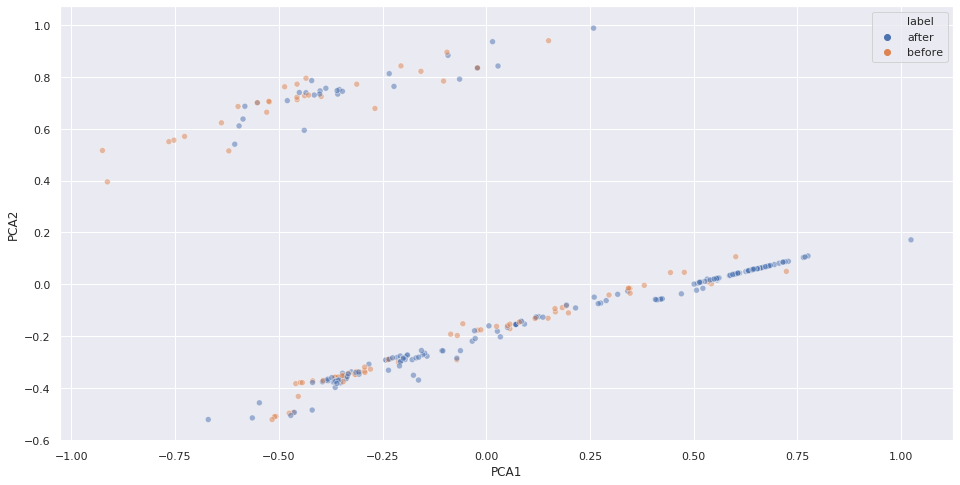

In [169]:
pca = PCA(n_components = 2, )

components_df = pd.DataFrame(pca.fit_transform(labeled_df.drop(["node", "label"], axis=1)),
                            columns=["PCA1", "PCA2"])

components_df['label'] = labeled_df['label']

# components_df = components_df[components_df.PCA1 > 0.2]

# components_df.label.value_counts()

plt.figure(figsize=(16,8))
sns.scatterplot(data=components_df, x="PCA1", y='PCA2', hue='label', alpha=0.5)

# Test Train Split

In [170]:
X = labeled_df.drop([
    "node", 
    "label", 
    "similarity_rank",
    
    # trimming less valuable estimators
    "shortest_path_length_to_entry",
    "primary_link",
    "category_matches_with_source",
#     "shortest_path_length_from_entry",
#     "in_edges",
#     "adjusted_reciprocity",
    
], axis=1)
y = labeled_df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

# Random Forest

In [156]:
rf = RandomForestClassifier(n_jobs=-1)
pca = PCA()

# pipeline steps
steps = [
#     ("pca", pca),
    ("rf", rf)
]

pipe = Pipeline(steps)

# GridSearch params
params = {
#     "pca__n_components": [4,5,6,7,8,9],
    
    "rf__criterion": ["gini", "entropy"],
    "rf__n_estimators": [100, 150, 200, 400],
    "rf__max_depth": [10, 15],
    "rf__min_samples_split": [2, 10, 20],
    "rf__min_samples_leaf": [5, 10],
    "rf__random_state": [0, 10, 42, 100], 
}

gs_model = GridSearchCV(pipe, params, n_jobs=-1, cv=3, verbose=2)

gs_model.fit(X_train, y_train)

print(gs_model.best_params_)


gs_model.score(X_test, y_test)

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  1.1min finished


{'rf__criterion': 'gini', 'rf__max_depth': 10, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2, 'rf__n_estimators': 400, 'rf__random_state': 10}


0.5897435897435898

In [108]:

best_estimators = pd.DataFrame(list(zip(X_train.columns, gs_model.best_estimator_.feature_importances_)), 
             columns=["Feature", "Estimation Strength"])

best_estimators.sort_values("Estimation Strength", ascending=False)

,Feature,Estimation Strength
5,page_rank,0.146283
3,shared_neighbors_with_entry_score,0.138240
6,adjusted_reciprocity,0.133170
4,centrality,0.108229
2,out_edges,0.099854
0,degree,0.094470
7,shortest_path_length_from_entry,0.084352
8,jaccard_similarity,0.059187
1,in_edges,0.028447


# XG Boost

In [172]:
model = XGBRFClassifier()

params = { 
    "learning_rate": [1, 2, 3],
    "random_state": [0, 10, 42, 100], 
}

gs_model = GridSearchCV(model, params, n_jobs=-1, cv=3, verbose=2)

gs_model.fit(X_train, y_train)

print(gs_model.best_params_)

gs_model.score(X_test, y_test)
# gs_model.score(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'learning_rate': 1, 'random_state': 42}


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.6s finished


0.7068965517241379

# SVM

In [163]:
pca = PCA()
model = SVC()

steps = [
    ("pca", pca),
    ("svm", model)
]

pipe = Pipeline(steps)

params = {
    "pca__n_components": [2,3,4,5], 
    
    "svm__C": [0.001, 0.01, 0.1, 1, 10, 15],
    "svm__kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "svm__decision_function_shape": ['ovo', 'ovr'],
    "svm__shrinking": [True, False]
}

gs_model = GridSearchCV(pipe, params, n_jobs=-1, cv=10, verbose=2)

gs_model.fit(X_train, y_train)

print(gs_model.best_params_)

gs_model.score(X_test, y_test)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 3368 tasks      | elapsed:    4.1s


{'pca__n_components': 2, 'svm__C': 10, 'svm__decision_function_shape': 'ovo', 'svm__kernel': 'rbf', 'svm__shrinking': True}


[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:    4.5s finished
/home/qdizon/.local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.38461538461538464

# KNN

In [171]:
pca = PCA()
knn = KNeighborsClassifier(n_jobs=-1,)

steps = [
    ("pca", pca),
    ("knn", knn)
]

pipe = Pipeline(steps)

params = {
    "pca__n_components": [2,3,4,5], 
    
    "knn__n_neighbors": [k for k in range(5, 26) if k % 2 != 0],
    "knn__metric": ['minkowski', "euclidean", "chebyshev", "wminkowski"]
}

gs_model = GridSearchCV(pipe, params, n_jobs=-1, cv=3, verbose=2, scoring="accuracy", error_score=0.0)

gs_model.fit(X_train, y_train)

print(gs_model.best_params_)

gs_model.best_estimator_.score(X_test, y_test)

Fitting 3 folds for each of 176 candidates, totalling 528 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    6.5s


{'knn__metric': 'minkowski', 'knn__n_neighbors': 5, 'pca__n_components': 4}


[Parallel(n_jobs=-1)]: Done 528 out of 528 | elapsed:    7.3s finished


0.7068965517241379

# Adaboost